In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import glob
import random
import matplotlib.pyplot as plt
import joblib

In [2]:
import numpy as np 
import os
import pandas as pd 
import time
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier , GradientBoostingClassifier , AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:

df1 = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")


In [4]:
nRowsRead = None 
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8
df.shape

(2830743, 79)

In [5]:
df[' Label'].value_counts()

 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

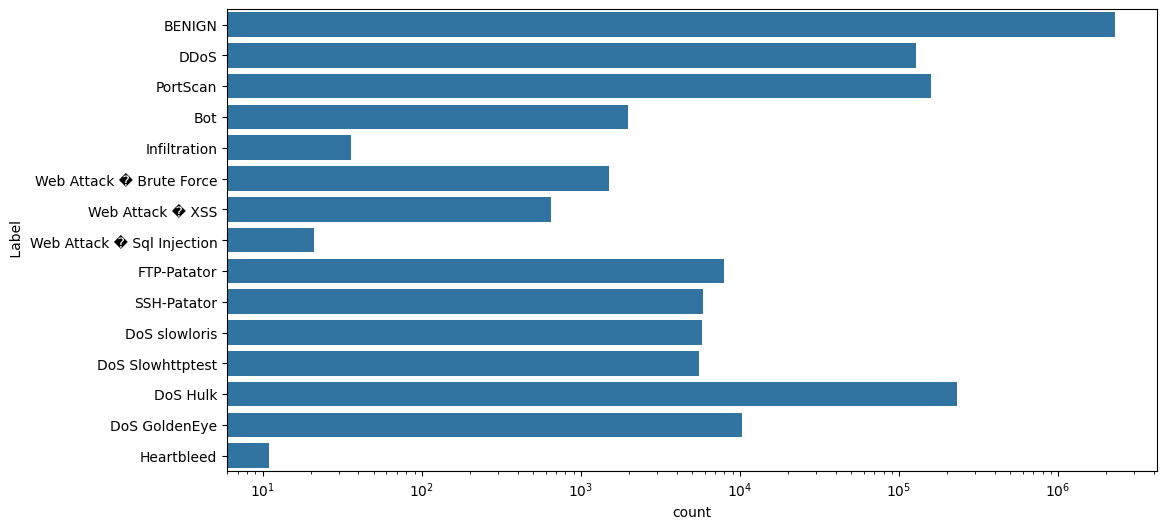

In [6]:
plt.figure(figsize=(12, 6))
plot = sns.countplot(y=df[' Label'])
plt.xscale('log')
fig = plot.get_figure()
fig.savefig('img1.png')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [8]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
df[" Label"].value_counts()

 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [10]:
df = df.dropna().reset_index()

In [11]:
df=df.drop(' Destination Port',axis=1)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
data_clean = df.dropna().reset_index()
labelencoder = LabelEncoder()
data_clean[' Label'] = labelencoder.fit_transform(data_clean[' Label'])

data_clean[' Label'].value_counts()

 Label
0     2272688
4      230124
10     158930
2      128027
3       10293
7        7938
11       5897
6        5796
5        5499
1        1966
12       1507
14        652
9          36
13         21
8          11
Name: count, dtype: int64

In [13]:
label_mappings = pd.DataFrame({
    'Original_Label': labelencoder.classes_,
    'Encoded_Label': labelencoder.transform(labelencoder.classes_)
})
label_mappings

,Original_Label,Encoded_Label
0,BENIGN,0
1,Bot,1
2,DDoS,2
3,DoS GoldenEye,3
4,DoS Hulk,4
5,DoS Slowhttptest,5
6,DoS slowloris,6
7,FTP-Patator,7
8,Heartbleed,8
9,Infiltration,9


In [14]:
data_clean

,level_0,index,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,3,2,0,12,0,6,6,6.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,1,1,109,1,1,6,6,6,6,6.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,2,2,52,1,1,6,6,6,6,6.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,3,3,34,1,1,6,6,6,6,6.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,4,4,3,2,0,12,0,6,6,6.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829380,2829380,692698,32215,4,2,112,152,28,28,28.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2829381,2829381,692699,324,2,2,84,362,42,42,42.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2829382,2829382,692700,82,2,1,31,6,31,0,15.5,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2829383,2829383,692701,1048635,6,2,192,256,32,32,32.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [15]:
data_np = data_clean.to_numpy(dtype="float32")

data_np = data_np[~np.isinf(data_np).any(axis=1)]

X = data_np[:, 0:78]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,79:]).toarray()

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_np)
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X_scaled.shape[1]
n_classes = Y.shape[1]
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [17]:
import pandas as pd

# Assuming 'data_clean' is your cleaned DataFrame
# Assuming 'Label' column is the one-hot encoded label column

# Group data by the label
grouped_data = data_clean.groupby(' Label')

# Create an empty DataFrame to store selected instances
selected_instances = pd.DataFrame()

# Iterate over groups and select 5 instances from each group
for label, group in grouped_data:
    selected_instances = pd.concat([selected_instances, group.head(5)])

# Reset the index of the selected instances DataFrame
selected_instances.reset_index(drop=True, inplace=True)

# Save the selected instances to a CSV file
selected_instances.to_csv('selected_instances.csv', index=False)

In [18]:
X_scaled.shape

(2827876, 80)

In [20]:
Y.shape

(2827876, 15)

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn import metrics
from tensorflow import keras
import tensorflow as tf

In [33]:
import warnings
from keras.regularizers import l1, l2

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, MaxPooling1D, Dropout
from sklearn import metrics


X_train = X_train.reshape(X_train.shape[0], 80, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 80, 1).astype('float32')

model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, padding="same", activation="relu", input_shape=(_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(filters=256, kernel_size=6, padding="same", activation="relu"))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.1))

model.add(Dense(n_classes, kernel_initializer='normal'))
model.add(Dense(n_classes, activation='softmax'))

model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                         batch_size=128,
                         epochs=3,
                         verbose=True,
                         validation_data=(X_test, Y_test))

c:\Users\mithu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_22 (Conv1D)              │ (None, 80, 128)        │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_22 (MaxPooling1D) │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, 40, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_23 (MaxPooling1D) │ (None, 20, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 5120)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │     1,310,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 15)             │         3,855 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 15)             │           240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,512,831 (5.77 MB)

 Trainable params: 1,512,831 (5.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
16570/16570 ━━━━━━━━━━━━━━━━━━━━ 1770s 107ms/step - accuracy: 0.9841 - loss: 0.3398 - val_accuracy: 0.9985 - val_loss: 0.0101
Epoch 2/3
16570/16570 ━━━━━━━━━━━━━━━━━━━━ 471s 28ms/step - accuracy: 0.9989 - loss: 0.0090 - val_accuracy: 0.9993 - val_loss: 0.0064
Epoch 3/3
16570/16570 ━━━━━━━━━━━━━━━━━━━━ 456s 27ms/step - accuracy: 0.9993 - loss: 0.0057 - val_accuracy: 0.9994 - val_loss: 0.0042


In [34]:
model.save('model.h5')

In [35]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time
import pandas as pd

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))

pred = np.argmax(pred, axis=1)
y_eval = np.argmax(Y_test, axis=1)

score = accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score = f1_score(y_eval, pred, average='weighted')

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval_bin = lb.transform(y_eval)
pred_bin = lb.transform(pred)
roc_score = roc_auc_score(y_eval_bin, pred_bin)

results_dict = {
    'Validation Score': [score],
    'Evaluation Score': [escore[1]],
    'Recall Score': [rscore],
    'Precision Score': [ascore],
    'F1 Measure Score': [f1score],
    'ROC-AUC Score': [roc_score],
    'Inference Time (seconds)': [inference_time]
}

results_df = pd.DataFrame(results_dict)

print('Completed')
print('Time taken:', dt.datetime.now() - start)

print(results_df)

22093/22093 ━━━━━━━━━━━━━━━━━━━━ 142s 6ms/step - accuracy: 0.9993 - loss: 0.0042
22093/22093 ━━━━━━━━━━━━━━━━━━━━ 99s 4ms/step
Inference time: 103.00 seconds


c:\Users\mithu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Completed
Time taken: 0:04:05.995927
   Validation Score  Evaluation Score  Recall Score  Precision Score  \
0          0.999385          0.999385      0.999385         0.999549   

   F1 Measure Score  ROC-AUC Score  Inference Time (seconds)  
0          0.999385       0.878533                102.999089  


In [36]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 ━━━━━━━━━━━━━━━━━━━━ 107s 5ms/step


In [37]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)

<Axes: >

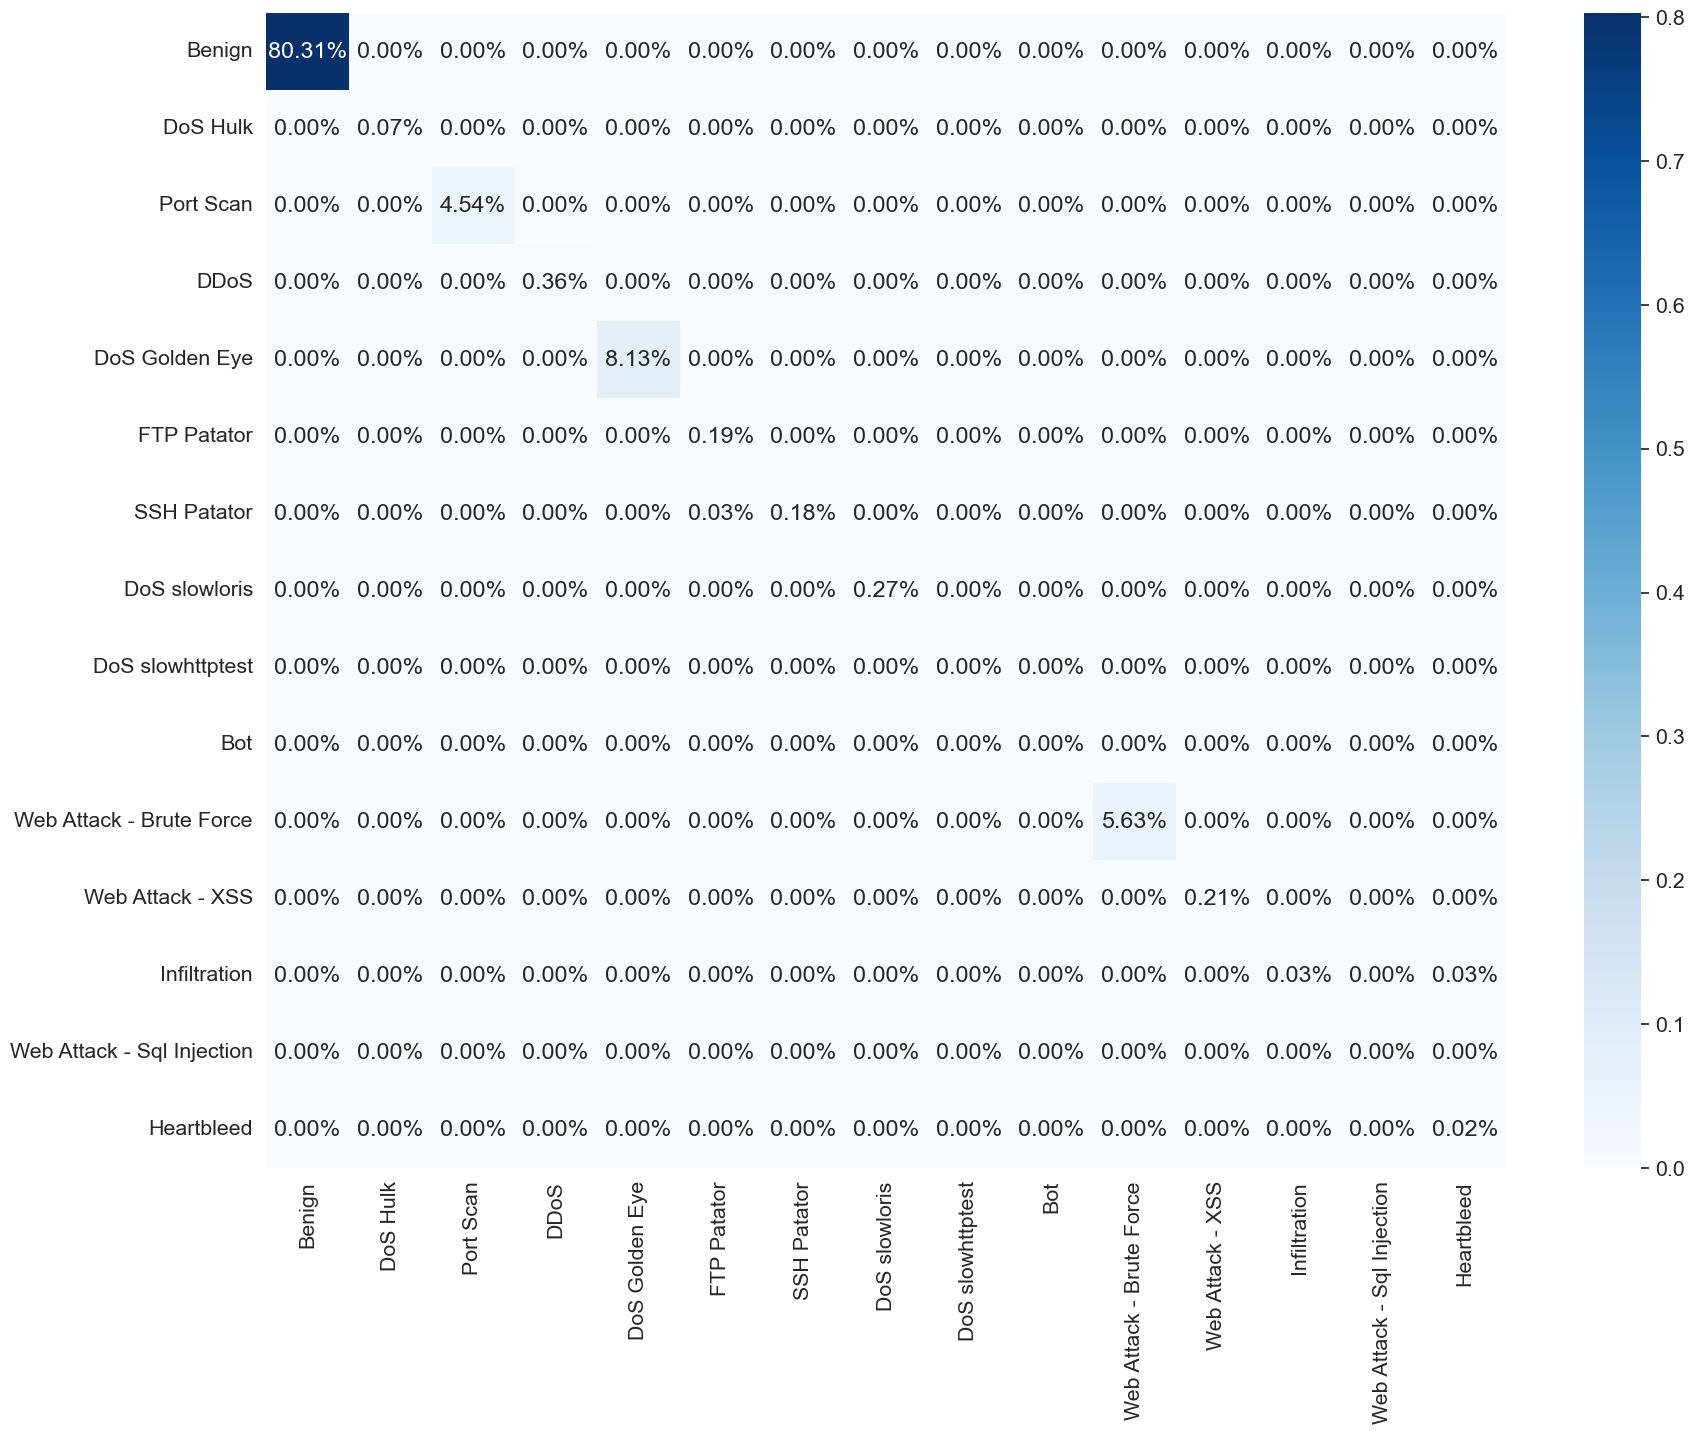

In [38]:
cf_matrix = confMat
plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)

labels = ['Benign','DoS Hulk','Port Scan','DDoS','DoS Golden Eye','FTP Patator','SSH Patator','DoS slowloris',
          'DoS slowhttptest','Bot','Web Attack - Brute Force','Web Attack - XSS','Infiltration','Web Attack - Sql Injection',
         'Heartbleed']

sn.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', xticklabels=labels, yticklabels=labels, cmap='Blues')

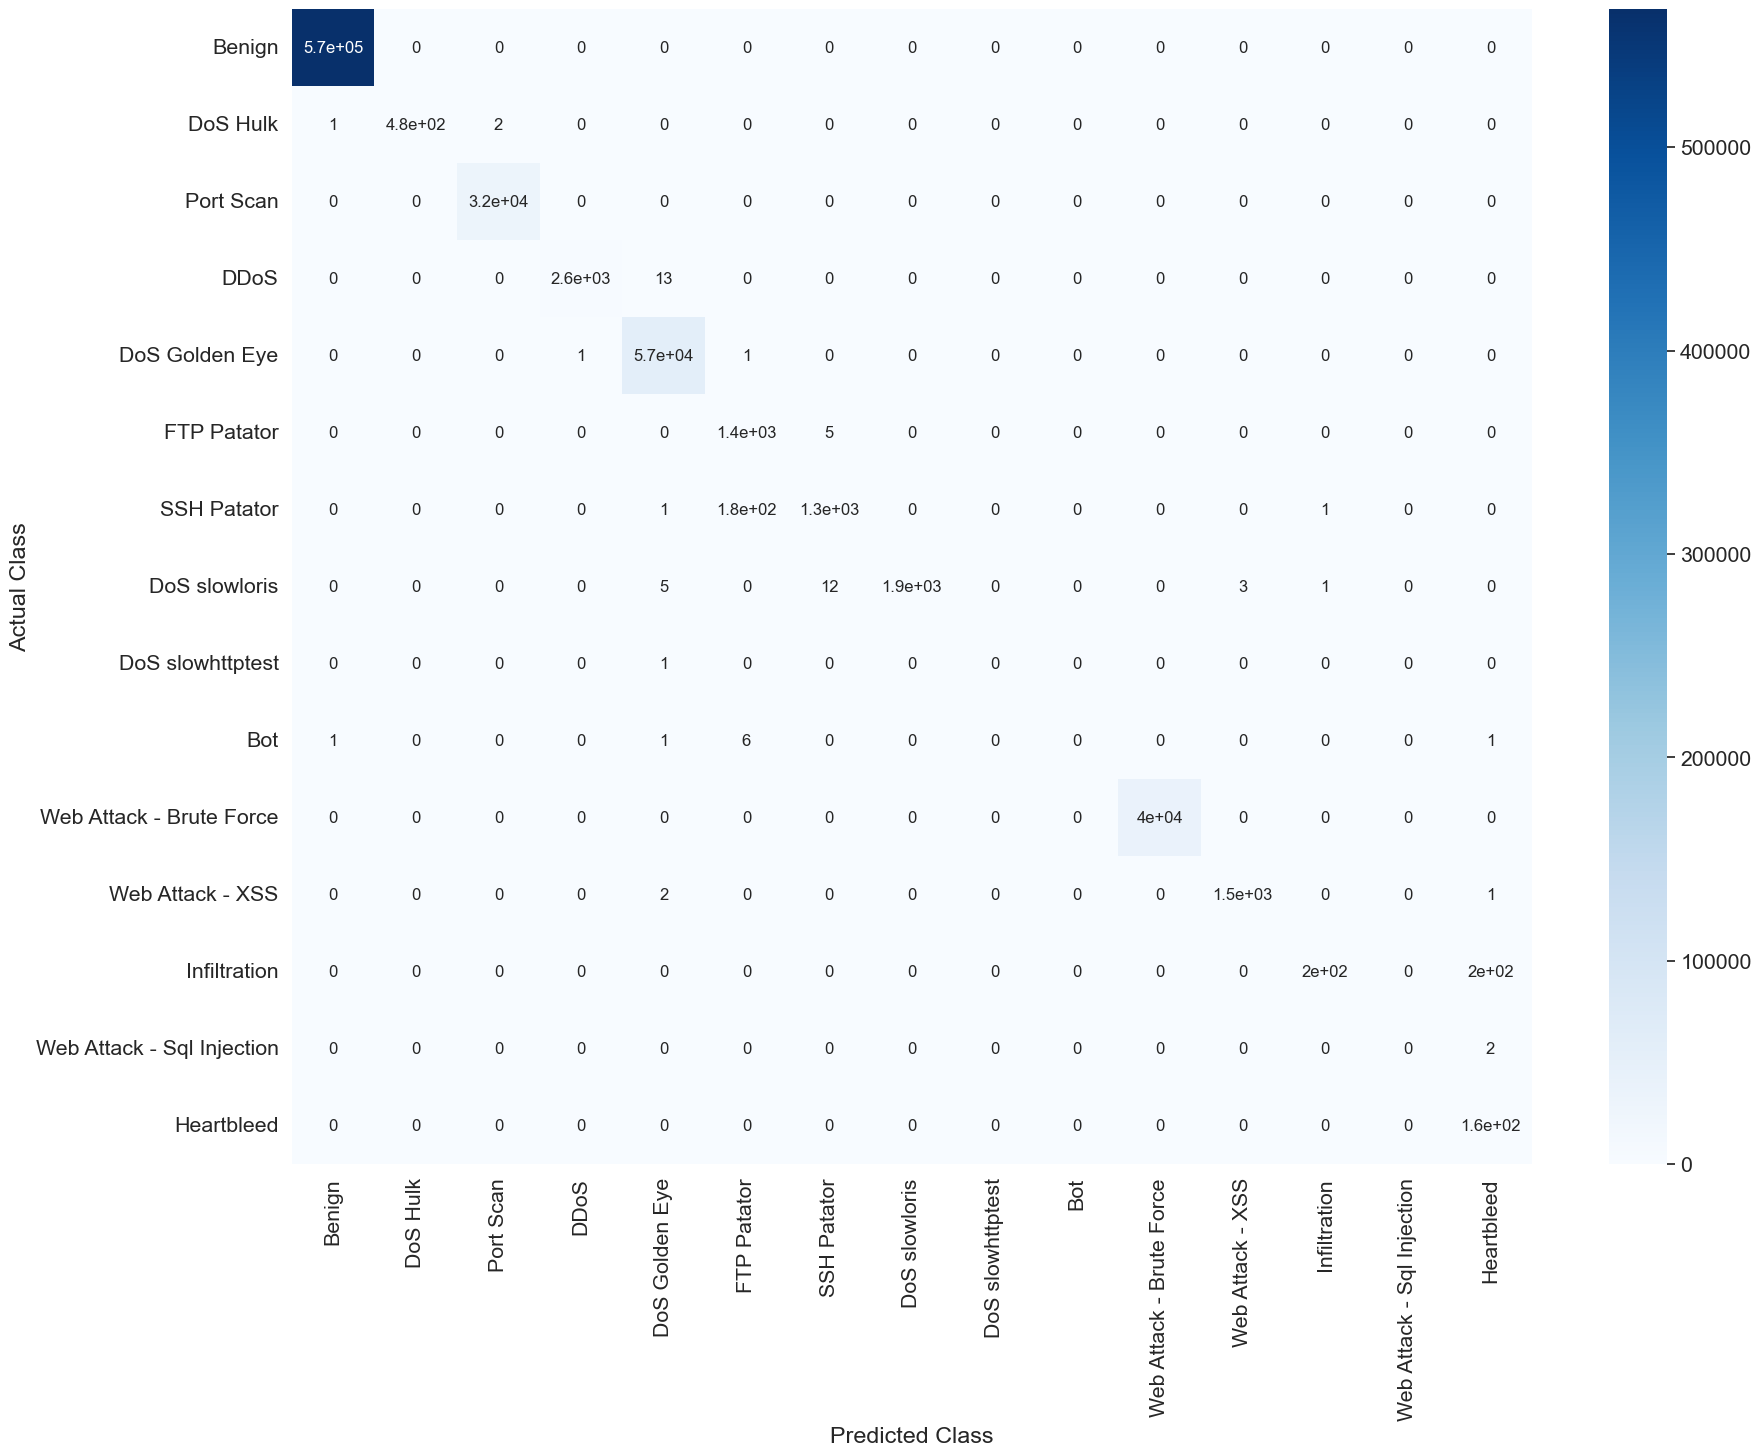

In [39]:
cm_df = pd.DataFrame(cf_matrix)

labels = ['Benign','DoS Hulk','Port Scan','DDoS','DoS Golden Eye','FTP Patator','SSH Patator','DoS slowloris',
          'DoS slowhttptest','Bot','Web Attack - Brute Force','Web Attack - XSS','Infiltration','Web Attack - Sql Injection',
         'Heartbleed']

plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
    
plt.show() 